# Evaluation Project - 8 : Customer Churn Analysis

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Required Libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the data set:

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Description:
'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'Churn'-These rae the details of the customers to find the  TotalCharges of the customer when there is possibility of churn.

In [4]:
df.isnull().sum() #checking the null value count of all the coulumns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns #checking the coulumn names of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes #c#checking the datatypes of each column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'].unique()#getting the unique values of the column

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.loc[df['TotalCharges']==" "] #checking  the empty rows of the column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [3]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)# replacing empty rows with nan values of this column
df.isnull().sum() #null count

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df['TotalCharges']=df['TotalCharges'].astype(float)#changingthe datatype as float for total charges column
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))#filling up the null value with the mean
df.isnull().sum()# null count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes# checking the data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making dataframe for the nominal data:

In [34]:
df_visual=df[['gender','SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']].copy()

In [14]:
df_visual.columns#getting all the columns of this dataframe

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualisation of the data:

Male      3555
Female    3488
Name: gender, dtype: int64


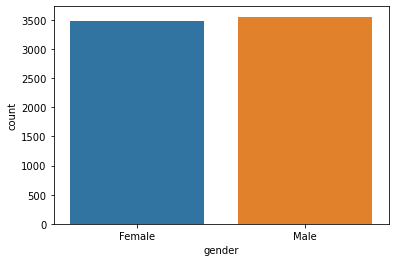

In [15]:
ax=sns.countplot(x='gender',data=df_visual)
print(df_visual['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


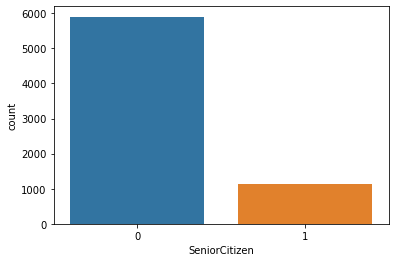

In [18]:
ax=sns.countplot(x='SeniorCitizen',data=df_visual)
print(df_visual['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


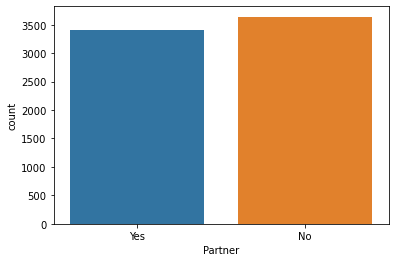

In [19]:
ax=sns.countplot(x='Partner',data=df_visual)
print(df_visual['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


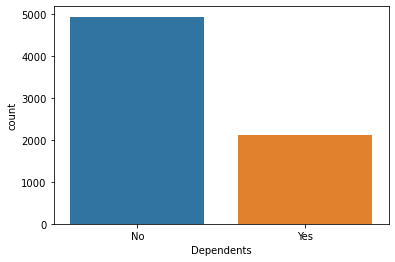

In [20]:
ax=sns.countplot(x='Dependents',data=df_visual)
print(df_visual['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


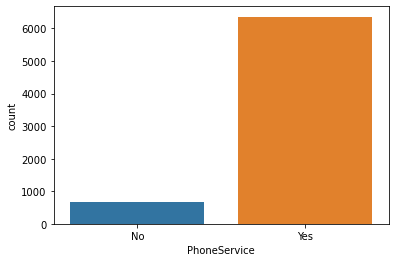

In [21]:
ax=sns.countplot(x='PhoneService',data=df_visual)
print(df_visual['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


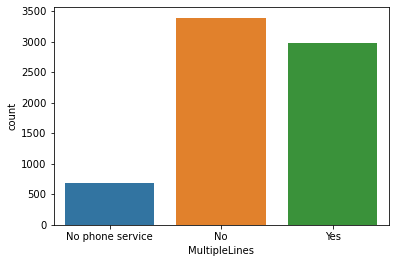

In [22]:
ax=sns.countplot(x='MultipleLines',data=df_visual)
print(df_visual['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


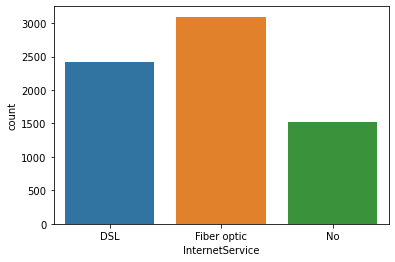

In [23]:
ax=sns.countplot(x='InternetService',data=df_visual)
print(df_visual['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


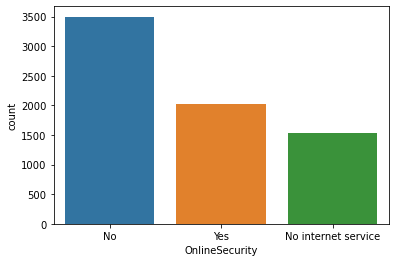

In [32]:
ax=sns.countplot(x='OnlineSecurity',data=df_visual)
print(df_visual['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


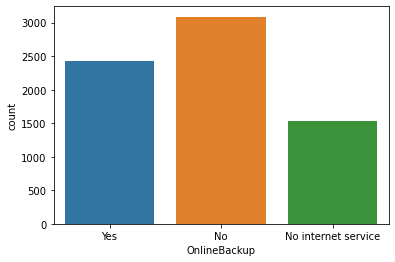

In [33]:
ax=sns.countplot(x='OnlineBackup',data=df_visual)
print(df_visual['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


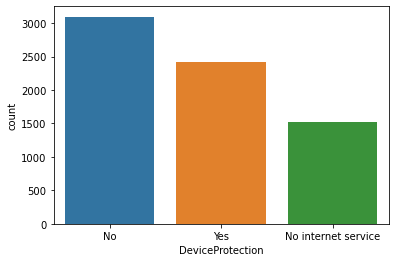

In [31]:
ax=sns.countplot(x='DeviceProtection',data=df_visual)
print(df_visual['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


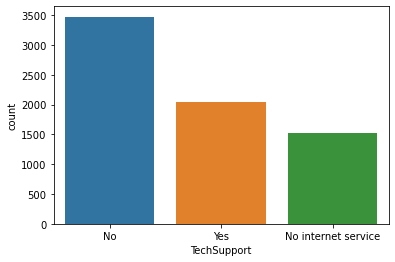

In [30]:
ax=sns.countplot(x='TechSupport',data=df_visual)
print(df_visual['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


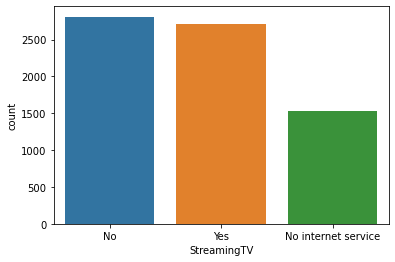

In [29]:
ax=sns.countplot(x='StreamingTV',data=df_visual)
print(df_visual['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


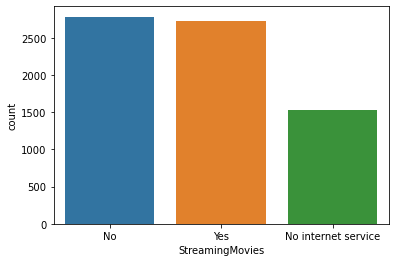

In [28]:
ax=sns.countplot(x='StreamingMovies',data=df_visual)
print(df_visual['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


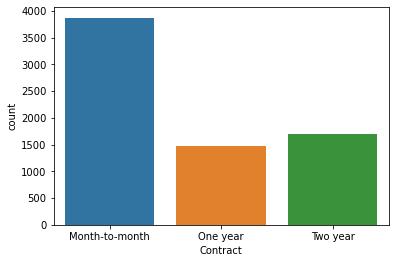

In [27]:
ax=sns.countplot(x='Contract',data=df_visual)
print(df_visual['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


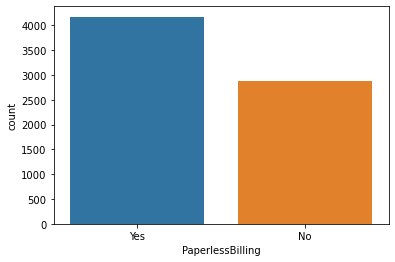

In [26]:
ax=sns.countplot(x='PaperlessBilling',data=df_visual)
print(df_visual['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


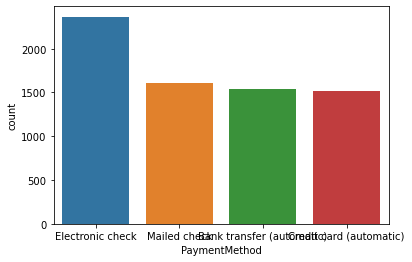

In [25]:
ax=sns.countplot(x='PaymentMethod',data=df_visual)
print(df_visual['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


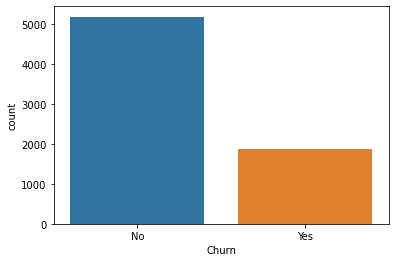

In [24]:
ax=sns.countplot(x='Churn',data=df_visual)
print(df_visual['Churn'].value_counts())

>visualisation for nominal data can be done using count plot.Here, visualisation of nominal data and its value counts of each pltis specified in the above plots.

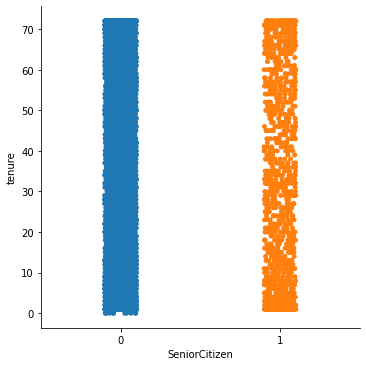

In [36]:
df_visual_ordinal=df[['customerID','tenure']].copy()
ax=sns.catplot(x='SeniorCitizen',y='tenure',data=df)

>Cat plot for ordinal data  is showm above

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

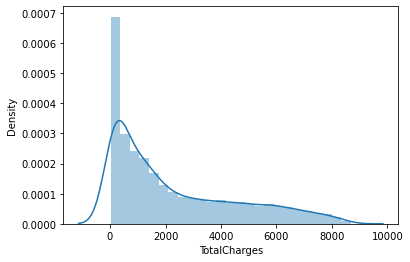

In [37]:
df_visual_continous=df[['MonthlyCharges','TotalCharges']].copy()
sns.distplot(df_visual_continous['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

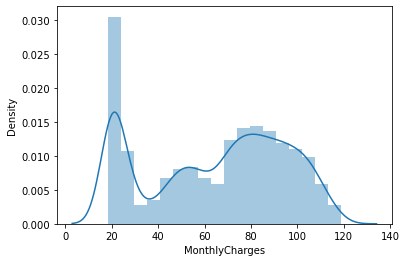

In [38]:
sns.distplot(df_visual_continous['MonthlyCharges'],kde=True)

>Since the above daset-df_visual_continous consists of continous data dist plot is plotted .

# Encoding:

In [5]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Description:

In [44]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Heat map for describing the dataset:

<AxesSubplot:>

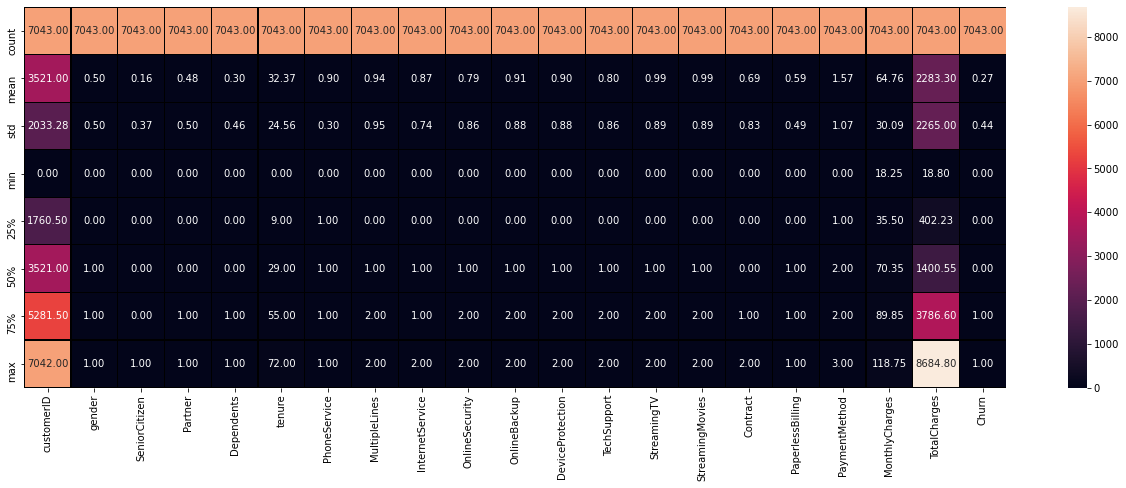

In [46]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

# Correlation using heat map:

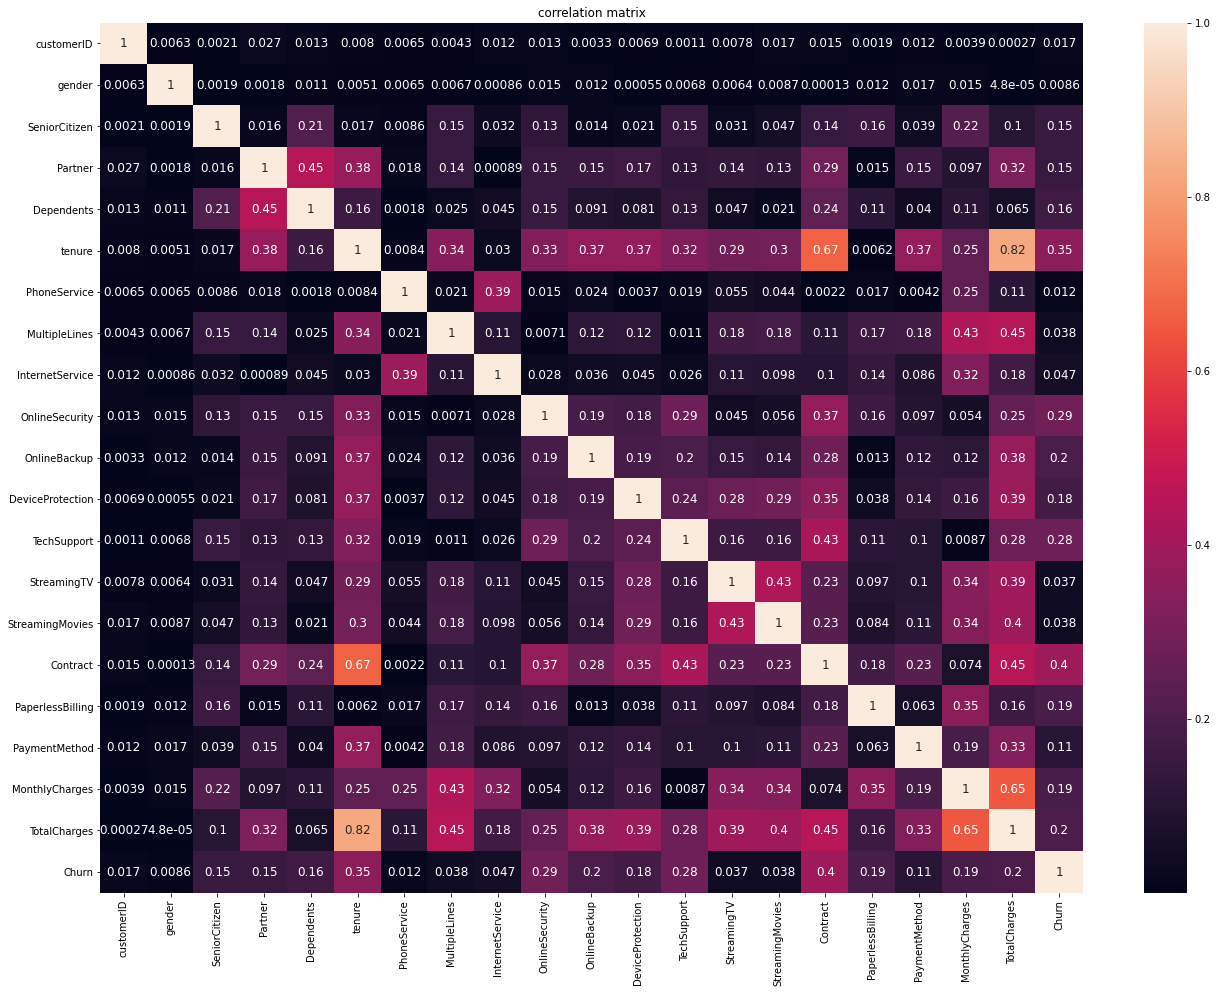

In [47]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show() 

# Correlation with TotalCharges of all the features:

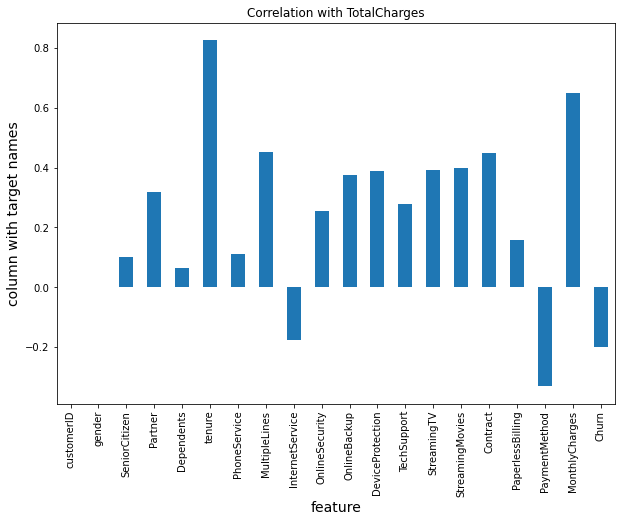

In [49]:
df.drop('TotalCharges',axis=1).corrwith(df.TotalCharges).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with TotalCharges')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.show()

# Skewness:

In [50]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Checking outliers:

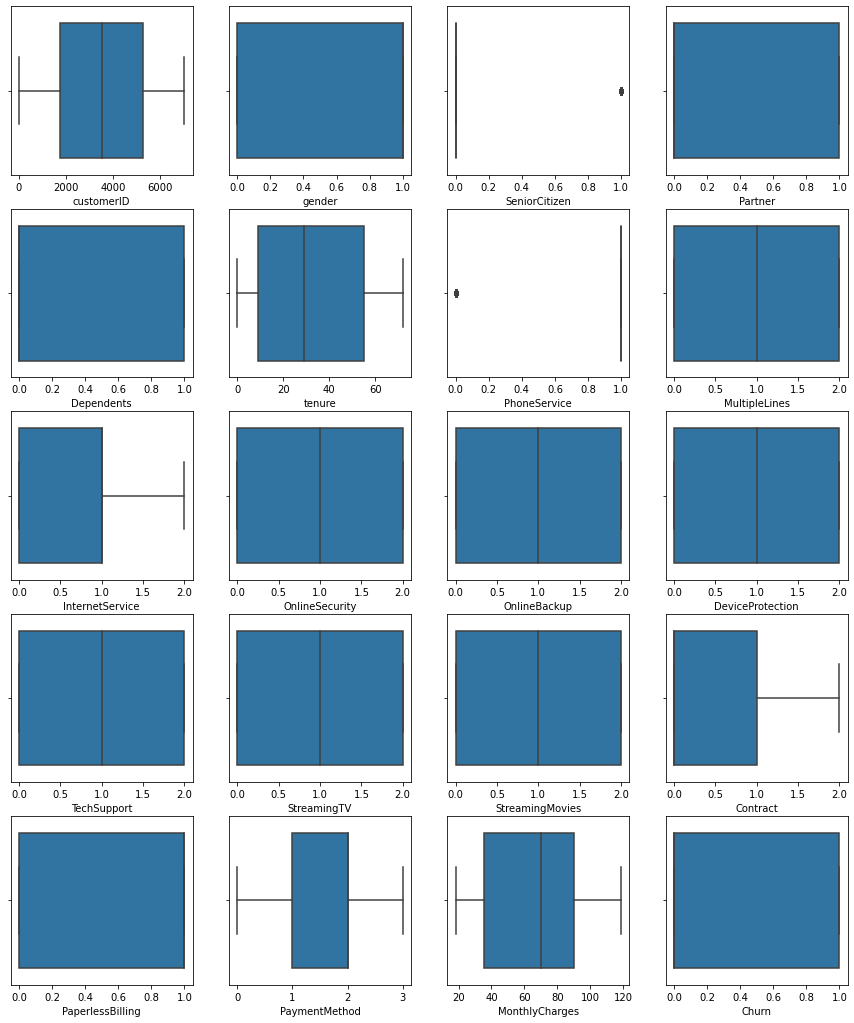

In [51]:
x=df.drop(columns=['TotalCharges'])
plt.figure(figsize=(15,18))
graph=1
for column in x:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()  

# Removing outliers using zscore technique:

In [6]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df_new=df[filtering_entry]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Loss Percentile:

In [7]:
loss_percent=(7043-6361)/7043*100
loss_percent

9.683373562402386

# Model Building:

In [8]:
x=df.drop(columns='TotalCharges')
y=df.TotalCharges

# Scaling the x variable:

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Finding the Best Random State:

In [11]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f'At random state-{i},the training accuracy is -{r2_score(y_train,pred_train)}')
        print(f'At random state-{i},the testing accuracy is -{r2_score(y_test,pred_test)}')
        print('\n')


At random state-12,the training accuracy is -0.904295058479142
At random state-12,the testing accuracy is -0.9042173834952041


At random state-31,the training accuracy is -0.9044003239480541
At random state-31,the testing accuracy is -0.9037125620748931


At random state-38,the training accuracy is -0.9043316704545361
At random state-38,the testing accuracy is -0.9039556111083614


At random state-40,the training accuracy is -0.9043830357530264
At random state-40,the testing accuracy is -0.9036195276240666


At random state-42,the training accuracy is -0.9042763981184584
At random state-42,the testing accuracy is -0.9043375885852347


At random state-47,the training accuracy is -0.9043177434505593
At random state-47,the testing accuracy is -0.904039494306215


At random state-68,the training accuracy is -0.9044724983486806
At random state-68,the testing accuracy is -0.9035221768135263


At random state-73,the training accuracy is -0.9043793318277787
At random state-73,the testing accu

random state 93 is having highest accuracy so we proceed splitting using this random state.

# Creating train-test split:

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=93)

# Linear Regression Model:

In [13]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)

0.9044657307246095

# CrossValidation Score:

In [14]:
training_accuracy=r2_score(y_train,pred_train)
testing_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    csv=cross_val_score(lr,x,y,cv=i)
    cv_mean=csv.mean()
    print('at cv:-',i)
    print('cv score-',cv_mean*100)
    print('training_accuracy-',training_accuracy*100)
    print('testing_accuracy-',testing_accuracy*100)

at cv:- 2
cv score- 90.33382537767005
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 3
cv score- 90.37012261875313
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 4
cv score- 90.37044584134894
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 5
cv score- 90.36665825623264
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 6
cv score- 90.37349024389361
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 7
cv score- 90.35677539347998
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 8
cv score- 90.35565941557735
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095
at cv:- 9
cv score- 90.36018659661283
training_accuracy- -90.49827811791013
testing_accuracy- 90.44657307246095


CV at 6 is performing well so we consider this CV

# Linear Regression Plot:

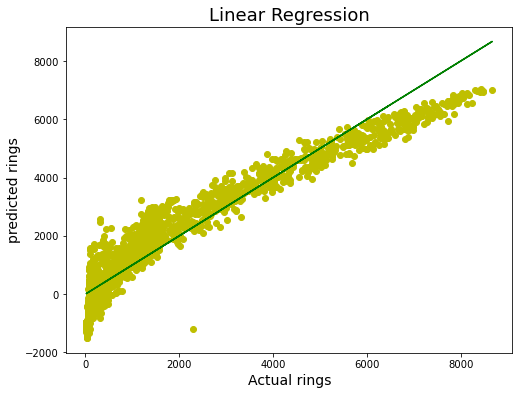

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularisation and HyperParameter Tuning:

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


# Lasso Regression :


In [17]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9044657740542563

In [19]:
csv=cross_val_score(ls,x,y,cv=6)
cv_mean=csv.mean()
cv_mean

0.9037405490414647

# Using Ensemble Approach:

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


# RandomForestRegression:

In [21]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=6)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  99.87712103643035
Cross validation Score:  99.87580336813892


# KNeighborsRegression:

In [22]:
from sklearn.neighbors import KNeighborsRegressor

param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[3,5 ,6,7,8],
            'n_neighbors':[3,5,7,9,11,13],
            'p':[1,2]}
knr=KNeighborsRegressor()
clf=GridSearchCV(knr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 13, 'p': 1}


In [23]:
knr=KNeighborsRegressor(algorithm='brute',leaf_size=3,n_neighbors=13,p=1)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr=knr.predict(x_test)

knrs=r2_score(y_test,pred_knr)
print('R2 Score: ',knrs*100)

knrcsv=cross_val_score(knr,x,y,cv=6)
knr_cv_mean=knrcsv.mean()
print('Cross validation Score: ',knr_cv_mean*100)

R2 Score:  89.30001212895675
Cross validation Score:  89.45567941718012


# DecisionTreeRegression:

In [24]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 7}


In [25]:
dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=10,min_samples_split=7)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=6)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  99.76917008570537
Cross validation Score:  99.75602789353886


# Out of all model Random foprest regressor is having R2 Score:  99.87712103643035 and Cross validation Score:  99.87580336813892 so this model is finalised and further saved.

# Saving the model:

In [26]:
import pickle
filename='customer_churn_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Loading the Pickle File and checking the Score:

In [28]:
loaded_model=pickle.load(open('customer_churn_prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9987712103643035


# Conclusion:

In [31]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_com

,Original,Predicted
0,399.60,389.6515
1,7108.20,7046.2885
2,1397.65,1396.7555
3,672.55,643.1020
4,865.10,991.7725
...,...,...
1404,664.40,677.9565
1405,33.60,39.5355
1406,1191.20,1253.6675
1407,5585.40,5657.0475
